In [1]:
using Pkg
pkg"activate ."
pkg"add JuMP"
pkg"add Cbc"
pkg"add Clp"
pkg"add Gurobi" # Precisa de licença
pkg"add Juniper"
pkg"add Ipopt"
pkg"add Plots"

 Activating environment at `~/Documents/streaming/notebooks/seminarios/Project.toml`
   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/seminarios/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/seminarios/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/seminarios/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/seminarios/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/seminarios/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/seminarios/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/seminarios/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/seminarios/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/seminarios/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/seminarios/Manifest.toml`
 [no chan

In [2]:
using Plots
plotlyjs()
plot(rand(3),rand(3))
nothing

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8350455810834496007\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18018821469999962491\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8350455810834496007\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
using JuMP, Cbc, Clp, Gurobi, Juniper, Ipopt

## Começo

$$ \min c^T x \qquad \text{s. a} \quad Ax = b, \quad x \geq 0. $$

- Variáveis
- Função objetivo
- Restrições
- Expressões

$$ \max x_1 + 2x_2 \qquad \text{s. a} \quad x_1 + 3x_2 \leq 6, \quad 7x_1 + 5x_2 \leq 12, \quad x \geq 0. $$

In [4]:
using JuMP, Clp

model = Model(Clp.Optimizer)

@variable(model, x1 ≥ 0)
@variable(model, x2 ≥ 0)

@objective(model, Max, x1 + 2x2)

@constraint(model, x1 + 3x2 ≤ 6)
@constraint(model, 7x1 + 5x2 ≤ 12)

print(model)

optimize!(model)

value(x1), value(x2), objective_value(model), termination_status(model), primal_status(model), dual_status(model)

Max x1 + 2 x2
Subject to
 x1 + 3 x2 ≤ 6.0
 7 x1 + 5 x2 ≤ 12.0
 x1 ≥ 0.0
 x2 ≥ 0.0
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 2.9999998 (2)
Clp0006I 2  Obj 4.125
Clp0000I Optimal - objective value 4.125
Clp0032I Optimal objective 4.125 - 2 iterations time 0.002


(0.37500000000000006, 1.875, 4.125, MathOptInterface.OPTIMAL, MathOptInterface.FEASIBLE_POINT, MathOptInterface.FEASIBLE_POINT)

In [5]:
using JuMP, Clp

model = Model(Clp.Optimizer)

@variable(model, x[1:2] ≥ 0)

@objective(model, Max, x[1] + 2x[2])

@constraint(model, x[1] + 3x[2] ≤ 6)
@constraint(model, 7x[1] + 5x[2] ≤ 12)

print(model)

optimize!(model)

value.(x), objective_value(model), termination_status(model), primal_status(model), dual_status(model)

Max x[1] + 2 x[2]
Subject to
 x[1] + 3 x[2] ≤ 6.0
 7 x[1] + 5 x[2] ≤ 12.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 2.9999998 (2)
Clp0006I 2  Obj 4.125
Clp0000I Optimal - objective value 4.125
Clp0032I Optimal objective 4.125 - 2 iterations time 0.002


([0.37500000000000006, 1.875], 4.125, MathOptInterface.OPTIMAL, MathOptInterface.FEASIBLE_POINT, MathOptInterface.FEASIBLE_POINT)

## Exemplo 1

- Alice e Bob trabalham fazendo brincos, colares e pulseiras de miçangas e fio;
- Cada brinco, colar e pulseira gastam 8, 50 e 30 miçangas, resp.;
- Cara brinco, colar e pulseira usam 30cm, 120 cm e 70 cm de fio, resp.;
- Cada brinco, colar e pulseira gastam 2h30min, 5h30min e 3h15min, resp.;
- O custo do pacote com 100 miçangas é R\\$ 2;
- O custo do rolo de 1 metro de fio é R\\$ 4,5;
- Uma análise preliminar indica que eles conseguem vender um brinco por R\\$ 12, um colar a R\\$ 30 e uma pulseira a R\\$ 18;
- Cada um tem 40h de trabalho por semana;
- A quantidade de miçangas e fio atualmente disponíveis é 3 pacotes e 1,2 m.

**Modelo**

_Conjuntos_
- $P = \{\text{brinco}, \text{colar}, \text{pulseira}\}$: conjunto de produtos
- $M = \{\text{rolo de fio}, \text{pacote de miçanga}\}$: conjunto de materiais

_Parâmetros_
- $a_m$: custo do material $m \in M$;
- $T_{\max}$: tempo disponível;
- $v_p$: preço de venda do produto $p \in P$;
- $T_p$: quantidade de tempo para produzir o produto $p \in P$;
- $Q_m$: quantidade inicial do material $m \in M$;
- $U_{m,p}$: quantidade de material $m \in M$ utilizada pelo produto $p \in P$.

_Variáveis_
- $x_p$: quantidade do produto $p \in P$ vendida;
- $y_m$: quantidade do material $m \in M$ comprada.

$$\begin{aligned}
\max\qquad & \sum_p v_p x_p - \sum_m a_m y_m \\
\text{s. a} \qquad & \sum_p T_p x_p \leq T_{\max} \\
& \sum_p U_{m,p} x_p \leq Q_m + y_m, \qquad \forall m \in M \\
& x_p, y_m \geq 0.
\end{aligned}$$

In [6]:
using JuMP, Clp

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
v = [12; 30; 18]
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]

model = Model(Clp.Optimizer)

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0)
@variable(model, y[1:nm] ≥ 0)

@objective(model, Max, sum(x[p] * v[p] for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)

@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])

print(model)

optimize!(model)

x, y = value.(x), value.(y)
for p = 1:np
    println("Produza $(x[p]) $(P[p])")
end
for m = 1:nm
    println("Compre $(y[m]) $(M[m])")
end

Max 12 x[1] + 30 x[2] + 18 x[3] - 4.5 y[1] - 2 y[2]
Subject to
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
Produza 0.0 brinco
Produza 0.0 colar
Produza 24.615384615384617 pulseira
Compre 16.030769230769234 rolo de fio
Compre 4.384615384615384 pacote de miçanga
Coin0506I Presolve 3 (0) rows, 5 (0) columns and 11 (0) elements
Clp0006I 0  Obj 0 Dual inf 48.499257 (3)
Clp0006I 4  Obj 362.16923
Clp0000I Optimal - objective value 362.16923
Clp0032I Optimal objective 362.1692308 - 4 iterations time 0.002


**Exemplo 1b**

In [7]:
using JuMP, Cbc

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
v = [12; 30; 18]
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]

model = Model(Cbc.Optimizer)

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0, Int)
@variable(model, y[1:nm] ≥ 0, Int)

@objective(model, Max, sum(x[p] * v[p] for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)

@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])

print(model)

optimize!(model)

x, y = value.(x), value.(y)
for p = 1:np
    println("Produza $(x[p]) $(P[p])")
end
for m = 1:nm
    println("Compre $(y[m]) $(M[m])")
end

Max 12 x[1] + 30 x[2] + 18 x[3] - 4.5 y[1] - 2 y[2]
Subject to
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 x[1] integer
 x[2] integer
 x[3] integer
 y[1] integer
 y[2] integer
Produza 5.0 brinco
Produza 1.0 colar
Produza 19.0 pulseira
Compre 15.0 rolo de fio
Compre 4.0 pacote de miçanga
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 362.169 - 0.00 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 3 rows, 5 columns (5 integer (0 of which binary)) and 11 elements
Cbc0012I Integer solution of -345.5 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 3 rows 5 columns, reduce

# Exemplo 2

- Fábricas produzem e enviam para centros de distribuição;
- Centros distribuem para o revendedor;
- Centros fazem estoque;
- Demanda semanal prevista para 4 semanas;
- Fábricas têm limite de produção em tempo;
- Existe custo de transporte e de estoque.

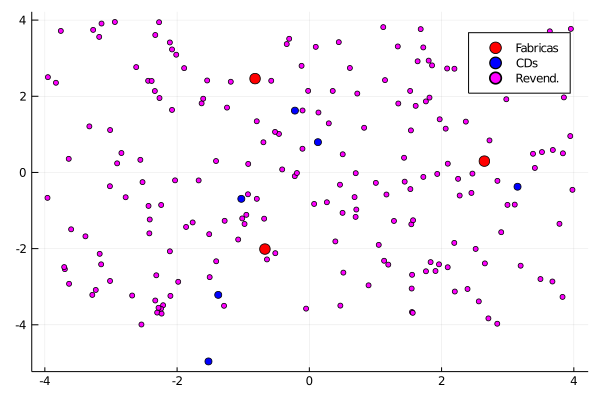

In [8]:
using Plots, Random
gr(size=(600,400))
Random.seed!(0)

nP = 4 * 3 # produtos
nT = 4 * 2 # horizonte
nF = 3 # fábricas
nCD = 6 # CDs
nR = 20 * 10 # Revendedores
Fxy = 3 * [cos.((1:nF) ./ nF * 2π) sin.((1:nF) ./ nF * 2π)] + randn(nF, 2)
CDxy = 2 * randn(nCD, 2)
Rxy = (2 * rand(nR, 2) .- 1) * 4

scatter(Fxy[:,1], Fxy[:,2], c=:red, ms=6, lab="Fabricas")
scatter!(CDxy[:,1], CDxy[:,2], c=:blue, ms=4, lab="CDs")
scatter!(Rxy[:,1], Rxy[:,2], c=:magenta, ms=3, lab="Revend.")

- $c^1_{i,j}$: custo de transporte da Fábrica $i$ para o CD $j$;
- $c^2_{j,k}$: custo de transporte do CD $j$ para o revendedor $k$;
- $E_j$: custo de estoque no CD $j$ por unidade de produto;
- $T_p$: tempo de produção do produto $p$;
- $L_i$: limite de tempo disponível na fábrica $i$;
- $D_{k,t,p}$: demanda do produto $p$ no revendedor $k$ na semana $t$;

- $x_{i,j,t,p}$: quantidade enviada do produto $p$ da fábrica $i$ para o CD $j$ na semana $t$;
- $y_{j,k,t,p}$: quantidade enviada do produto $p$ do CD $j$ para o revendedor $k$ na semana $t$;
- $z_{j,t,p}$: quantidade armazenada do produto $p$ no CD $j$ da semana $t$ para a $t+1$.

$$\begin{aligned}
\min \qquad & \sum_{i,j,t,p} c^1_{i,j} x_{i,j,t,p} + \sum_{j,k,t,p} c^2_{j,k} y_{j,k,t,p}
+ \sum_{j,t,p} E_j z_{j,t,p} \\
\text{suj. a} \qquad & \sum_{j,p} T_p x_{i,j,t,p} \leq L_i, \qquad \forall i, t \\
& z_{j,0,p} = 0, \qquad \forall t, p \\
& \sum_i x_{i,j,t,p} + z_{j,t-1,p} = \sum_k y_{j,k,t,p} + z_{j,t,p}, \qquad \forall j, t, p \\
& \sum_j y_{j,k,t,p} \geq D_{k,t,p} \qquad \forall k, t, p
\end{aligned}$$

In [9]:
using Random
using LinearAlgebra
Random.seed!(0)

# Criando dados falsos
c1 = [norm(Fxy[i,:] - CDxy[j,:]) for i = 1:nF, j = 1:nCD]
c2 = [norm(CDxy[j,:] - Rxy[k,:]) for j = 1:nCD, k = 1:nR]
E = rand(10:20, nCD)
T = rand(1:20, nP) / 60
L = rand(10:20, nF) * nR * nP
D = rand(10:15, nR, nT, nP);

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (linux64)
Optimize a model with 19800 rows, 117576 columns and 235008 nonzeros
Model fingerprint: 0x1c204eb1
Variable types: 0 continuous, 117576 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+00]
  Objective range  [1e-01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+04]
Found heuristic solution: objective 1774120.6720
Presolve removed 0 rows and 108 columns
Presolve time: 0.42s
Presolved: 19800 rows, 117468 columns, 234900 nonzeros
Variable types: 0 continuous, 117468 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.02s

Solved with dual simplex

Root relaxation: objective 7.005903e+05, 23205 iterations, 0.43 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  

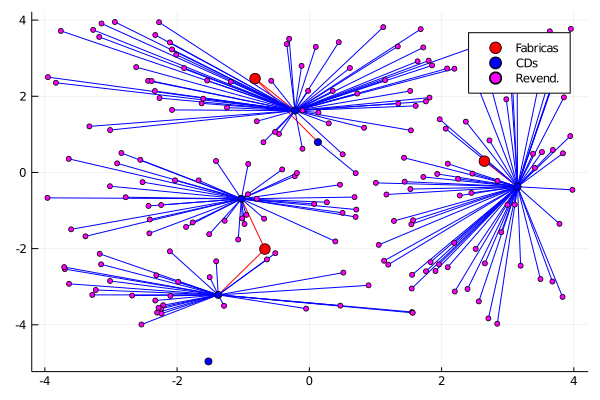

In [10]:
using JuMP, Cbc, Gurobi

#model = Model(optimizer_with_attributes(Cbc.Optimizer, "seconds" => 10.0))
model = Model(Gurobi.Optimizer)

@variable(model, x[i=1:nF, j=1:nCD, t=1:nT, p=1:nP] ≥ 0, Int)
@variable(model, y[j=1:nCD, k=1:nR, t=1:nT, p=1:nP] ≥ 0, Int)
@variable(model, z[j=1:nCD, t=0:nT, p=1:nP] ≥ 0, Int)

fix.(z[:,0,:], 0.0, force=true)

@objective(model, Min,
           sum(x[i,j,t,p] * c1[i,j] for i=1:nF, j=1:nCD, t=1:nT, p=1:nP) +
           sum(y[j,k,t,p] * c2[j,k] for j=1:nCD, k=1:nR, t=1:nT, p=1:nP) +
           sum(z[j,t,p] * E[j] for j=1:nCD, t=1:nT, p=1:nP))

@constraint(model, lim_tempo[i=1:nF,t=1:nT],
            sum(T[p] * x[i,j,t,p] for j=1:nCD, p=1:nP) ≤ L[i])
@constraint(model, balanco[j=1:nCD,t=1:nT,p=1:nP],
            sum(x[i,j,t,p] for i = 1:nF) + z[j,t-1,p] ==
            sum(y[j,k,t,p] for k = 1:nR) + z[j,t,p])
@constraint(model, demanda[k=1:nR,t=1:nT,p=1:nP],
            sum(y[j,k,t,p] for j = 1:nCD) ≥ D[k,t,p])

optimize!(model)

length(all_variables(model))

function figura(x, y, z)
    x = round.(Int, value.(x))
    y = round.(Int, value.(y))
    z = round.(Int, value.(z))

    plot()
    t = 1
    for i = 1:nF, j = 1:nCD
        if any(x[i,j,t,:] .> 0)
            plot!([Fxy[i,1], CDxy[j,1]], [Fxy[i,2], CDxy[j,2]], c=:red, lab="")
        end
    end
    for j = 1:nCD, k = 1:nR
        if any(y[j,k,t,:] .> 0)
            plot!([CDxy[j,1], Rxy[k,1]], [CDxy[j,2], Rxy[k,2]], c=:blue, lab="")
        end
    end
    scatter!(Fxy[:,1], Fxy[:,2], c=:red, ms=6, lab="Fabricas")
    scatter!(CDxy[:,1], CDxy[:,2], c=:blue, ms=4, lab="CDs")
    scatter!(Rxy[:,1], Rxy[:,2], c=:magenta, ms=3, lab="Revend.")
end

figura(x, y, z)

## Exemplo 3

Regressão Logística

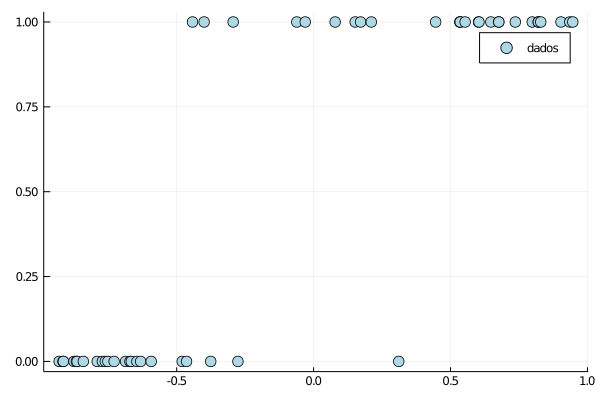

In [11]:
using Plots, Random
gr(size=(600,400))

Random.seed!(0)
n = 50
x = sort(rand(n) * 2 .- 1)
y = [xi + 0.2 + randn() * 0.25 > 0 ? 1 : 0 for xi in x]

scatter(x, y, m=(:lightblue, 6), lab="dados")

$$ h(x; \beta) = \sigma(\beta_0 + \beta_1 x) = \frac{1}{1 + e^{-\beta_0 - \beta_1 x}} $$

$$ \max \ell(\beta) = \sum_i y_i \ln h(x_i, \beta) + (1 - y_i) \ln \big(1 - h(x_i,\beta)\big) $$


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

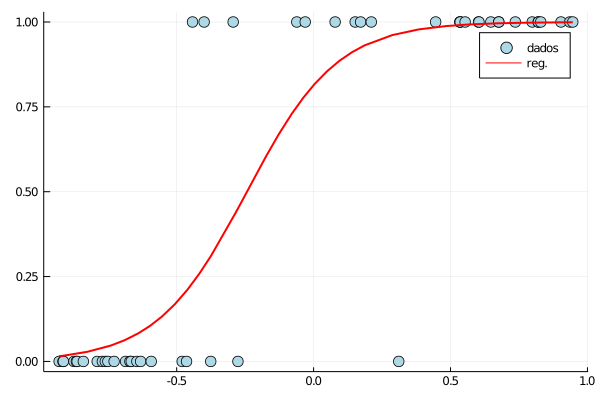

In [12]:
using JuMP, Ipopt

model = Model(Ipopt.Optimizer)

@variable(model, β[0:1])

@NLexpression(model, hi[i=1:n], 1 / (1 + exp(-β[0] - β[1] * x[i])))
@NLobjective(model, Max,
             sum(y[i] * log(hi[i]) + (1 - y[i]) * log(1 - hi[i]) for i = 1:n) )

optimize!(model)

function figura_reglog(β)
    β = value.(β)

    scatter(x, y, m=(:lightblue, 6), lab="dados")
    plot!(x -> 1 / (1 + exp(-β[0] - β[1] * x)), extrema(x)..., c=:red, lw=2, lab="reg.")
end

figura_reglog(β)

## Exemplo 4

- Tudo do exemplo 1b:
- Alice e Bob trabalham fazendo brincos, colares e pulseiras de miçangas;
- Cada brinco, colar e pulseira gastam 8, 50 e 30 miçangas, resp.;
- Cara brinco, colar e pulseira usam 30cm, 120 cm e 70 cm de fio, resp.;
- Cada brinco, colar e pulseira gastam 2h30min, 5h30min e 3h15min, resp.;
- O custo do pacote com 100 miçangas é R\\$ 2;
- O custo do rolo de 1 metro de fio é R\\$ 4,5;
- Uma análise priliminar indica que eles conseguem vender um brinco por R\\$ 12, um colar a R\\$ 30 e uma pulseira a R\\$ 18;
- Cada um tem 40h de trabalho por semana;
- A quantidade de miçangas e fio atualmente disponíveis é 3 pacotes e 1,2 m.

- Além disso, a demanda depende linearmente do valor do item, i.e., $d_p = \alpha_p + \beta_p v_p$, onde
    - $\alpha = 11, 6.25,$ e $28.5$ e $\beta = -0.7, -0.075$, e $-0.91$ para brinco, colar e pulseira, resp.

**Modelo**

_Conjuntos_
- $P = \{\text{brinco}, \text{colar}, \text{pulseira}\}$: conjunto de produtos
- $M = \{\text{rolo de fio}, \text{pacote de miçanga}\}$: conjunto de materiais

_Parâmetros_
- $a_m$: custo do material $m \in M$;
- $T_{\max}$: tempo disponível;
- $T_p$: quantidade de tempo para produzir o produto $p \in P$;
- $Q_m$: quantidade inicial do material $m \in M$;
- $U_{m,p}$: quantidade de material $m \in M$ utilizada pelo produto $p \in P$;
- $\alpha_p$ e $\beta_p$, tais que $d_p = \alpha_p + \beta_p v_p$ é a demanda do produto $p \in P$.

_Variáveis_
- $x_p$: quantidade do produto $p \in P$ vendida;
- $v_p$: valor de venda do produto $p \in P$;
- $y_m$: quantidade do material $m \in M$ comprada.

_Expressão_
- $d_p = \alpha_p + \beta_p v_p$.

$$\begin{aligned}
\max\qquad & \sum_p v_p x_p - \sum_m a_m y_m \\
\text{s. a} \qquad & \sum_p T_p x_p \leq T_{\max} \\
& \sum_p U_{m,p} x_p \leq Q_m + y_m, \qquad \forall m \in M \\
& x_p \leq d_p = \alpha_p + \beta_p v_p, \qquad \forall p \in P \\
& d_p \geq 0 \\
& x_p, y_m, v_p \geq 0.
\end{aligned}$$

In [13]:
using JuMP, Gurobi, Juniper, Ipopt

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]
α = [11; 6.25; 28.5]
β = [-0.7; -0.075; -0.91]

#model = Model(optimizer_with_attributes(Gurobi.Optimizer, "NonConvex" => 2))
optimizer = Juniper.Optimizer
nl_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0)
model = Model(optimizer_with_attributes(optimizer, "nl_solver" => nl_solver))

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0, Int)
@variable(model, y[1:nm] ≥ 0, Int)
@variable(model, v[1:np] ≥ 0, Int)

@expression(model, d[p=1:np], α[p] + β[p] * v[p] / 100)

@objective(model, Max, sum(x[p] * v[p] / 100 for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)
@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])
@constraint(model, demanda_naonegativa[p=1:np], d[p] ≥ 0)
@constraint(model, demanda[p=1:np], x[p] ≤ d[p])

print(model)

optimize!(model)

function imprime(x, y, v)
    x, y, v = round.(Int, value.(x)), round.(Int, value.(y)), round.(Int, value.(v)) / 100
    d = round.(Int, α + β .* v)
    for p = 1:np
        println("Produza $(x[p]) $(P[p]) a preço $(v[p]). Demanda $(d[p])")
    end
    for m = 1:nm
        println("Compre $(y[m]) $(M[m])")
    end
end

imprime(x, y, v)

Max 0.01 x[1]*v[1] + 0.01 x[2]*v[2] + 0.01 x[3]*v[3] - 4.5 y[1] - 2 y[2]
Subject to
 demanda_naonegativa[1] : -0.006999999999999999 v[1] ≥ -11.0
 demanda_naonegativa[2] : -0.00075 v[2] ≥ -6.25
 demanda_naonegativa[3] : -0.0091 v[3] ≥ -28.5
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 demanda[1] : x[1] + 0.006999999999999999 v[1] ≤ 11.0
 demanda[2] : x[2] + 0.00075 v[2] ≤ 6.25
 demanda[3] : x[3] + 0.0091 v[3] ≤ 28.5
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 v[1] ≥ 0.0
 v[2] ≥ 0.0
 v[3] ≥ 0.0
 x[1] integer
 x[2] integer
 x[3] integer
 y[1] integer
 y[2] integer
 v[1] integer
 v[2] integer
 v[3] integer


┌ Info: no explicit NLP constraints or objective provided using @NLconstraint or @NLobjective macros
└ @ Juniper /home/abel/.julia/packages/Juniper/Hm6I1/src/MOI_wrapper/MOI_wrapper.jl:346


nl_solver         : MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute,Any}[MathOptInterface.RawParameter("print_level") => 0])
feasibility_pump  : false
log_levels        : [:Options, :Table, :Info]

#Variables: 8
#IntBinVar: 8
#Constraints: 9
#Linear Constraints: 9
#Quadratic Constraints: 0
#NonLinear Constraints: 0
Obj Sense: Max

Incumbent using start values: 0.0
Status of relaxation: LOCALLY_SOLVED
Time for relaxation: 4.857758045196533
Relaxation Obj: 41.508224145520394

 ONodes   CLevel          Incumbent                   BestBound            Gap    Time   Restarts  GainGap  
    2       2                0.0                        41.51             Inf%    1.6       0         -     
    3       3                0.0                        330.59            Inf%    2.2       -         >>    
    4       4                0.0                        330.59            Inf%    2.2       -         >>    
    5       4             

## Exemplo - SVM

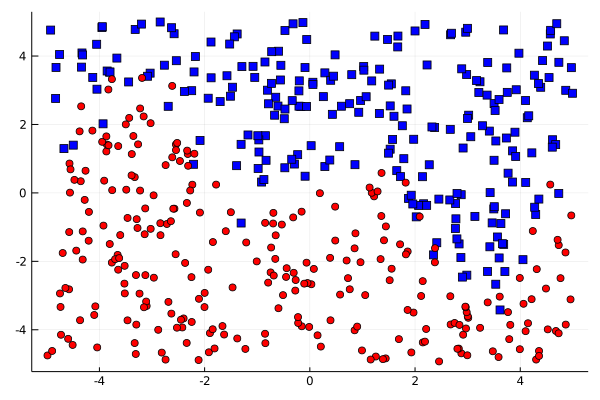

In [14]:
using Random, LinearAlgebra

Random.seed!(0)
n = 500
X = (2 * rand(n, 2) .- 1) * 5
#y = [X[i,1]^2 + 0.3 * X[i,2] + log(0.5X[i,2]^2 + 0.4) * X[i,1] > 0.7 + randn() * 0.2 ? 1 : -1 for i = 1:n]
y = [X[i,2] - cos(X[i,1]) * X[i,1] > 0.2 + randn() * 0.5 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

$$
\begin{aligned}
\max \qquad & \sum \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j K_{i,j} \\
\text{s.a} \qquad & \sum \alpha_i y_i = 0 \\
& 0 \leq \alpha \leq C.
\end{aligned}
$$

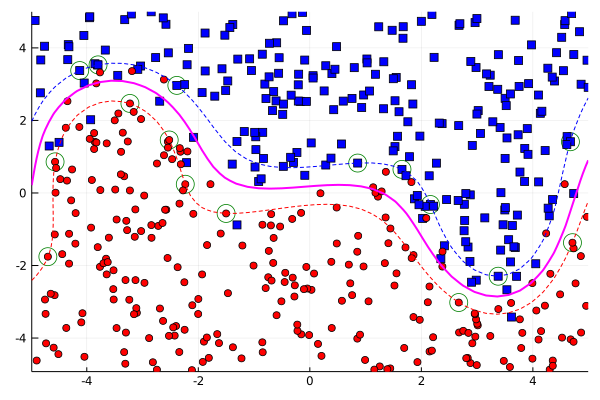

In [15]:
using JuMP, Ipopt

σ = 3
K(x1, x2) = exp(-norm(x1 - x2)^2 / 2σ^2)
#K(x1, x2) = (1 + dot(x1, x2))^5
#κ, c = 0.2, 0.5
#K(x1, x2) = tanh(κ * dot(x1, x2) + c)

Kmat = [K(X[i,:], X[j,:]) for i = 1:n, j = 1:n]
C = 1e2

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

@variable(model, 0 ≤ α[i=1:n] ≤ C)

@objective(model, Max, sum(α) - 0.5 * sum(α[i] * α[j] * y[i] * y[j] * Kmat[i,j] for i = 1:n, j = 1:n))
@constraint(model, sum(α .* y) == 0)

optimize!(model)

plot(leg=false)

α = value.(α)
I = findall(1e-4 .< α .< C - 1e-4)
J = findall(α .> 1e-4)

k = I[1]
b = y[k] - sum(α[i] * y[i] * K(X[i,:], X[k,:]) for i = J)

scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=50)
x2g = range(extrema(X[:,2])..., length=50)

F(x) = sum(α[i] * y[i] * K(x, X[i,:]) for i = J) + b
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[0.0], c=:magenta, lw=2)
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[1.0], c=:blue, l=:dash)
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[-1.0], c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

In [16]:
using NLPModels, JSOSolvers
Random.seed!(0)

activation(t) = 1 / (1 + exp(-t))

n1 = 3
n2 = 3

y01 = (y .+ 1) / 2

h(θ, x) = begin
    W1 = reshape(θ[1:2n1], n1, 2)
    b1 = θ[2n1+1:3n1]
    k = 3n1
    W2 = reshape(θ[k+1:k+n1*n2], n2, n1)
    k += n1 * n2
    b2 = θ[k+1:k+n2]
    k += n2
    W3 = reshape(θ[k+1:k+n2], 1, n2)
    b3 = θ[k+n2+1]
    z1 = activation.(W1 * x + b1)
    z2 = activation.(W2 * z1 + b2)
    z3 = activation((W3 * z2)[1] + b3)
    return z3
end

ℓ(y, yhat) = -y * log(yhat) - (1 - y) * log(1 - yhat)

f(θ) = sum(ℓ(y01[i], h(θ, X[i,:])) for i = 1:n)

nvar = 2n1 + n1 + n1 * n2 + n2 + n2 + 1
θ0 = randn(nvar)
nlp = ADNLPModel(f, θ0)

ADNLPModel(Minimization problem Generic
nvar = 25, ncon = 0 (0 linear)
, Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), f, NLPModels.var"#118#121"())

In [17]:
output = trunk(nlp, max_time=10.0)

┌ Info:   iter      f(x)         π         Δ     ratio   inner      bk         cgstatus  
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:67
┌ Info:      0   3.5e+02   6.9e+01   6.9e+00   1.7e-01       3       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:156
┌ Info:      1   2.3e+02   6.2e+01   6.9e+00   6.1e-02       4       1  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:156
┌ Info:      2   2.1e+02   9.8e+01   6.9e+00   7.9e-02       3       2  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:156
┌ Info:      3   1.9e+02   8.0e+01   6.9e+00   7.7e-02       3       5  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:156
┌ Info:      4   1.7e+02   1.1e+02   6.9e+00   2.3e-03       4       6  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/dev/JSOSolvers/src/trunk.jl:156
┌ Info:      5   1.7e+02   6.4e+01  

"Execution stats: maximum elapsed time"

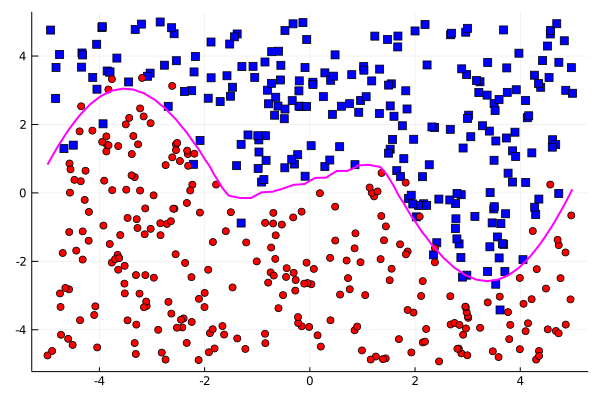

In [18]:
θsol = output.solution

plot(leg=false)

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=50)
x2g = range(extrema(X[:,2])..., length=50)

contour!(x1g, x2g, (x1, x2) -> h(θsol, [x1; x2]), levels=[0.5], c=:magenta, lw=2)

## Simulação braquistócrona

$$ v_{i+1}^2 = v_i^2 + 2a\Delta s $$
$$ t = \frac{v_{i+1} - v_i}{a} $$
$$ a = g \cos \theta = g \frac{\Delta y}{\Delta s} $$

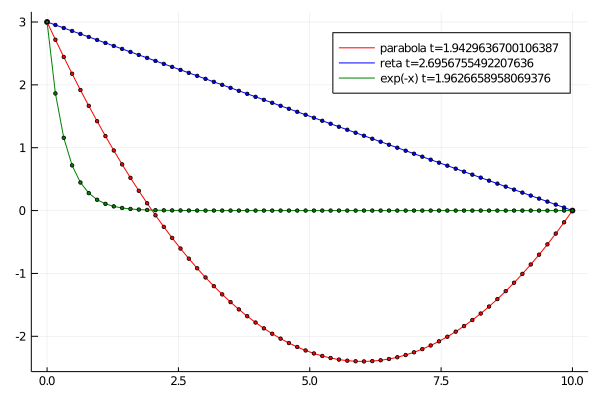

In [19]:
function simula(x, y)
    v = 0.0
    g = -10.0
    n = length(x)
    t = 0.0
    for i = 1:n-1
        Δy = y[i+1] - y[i]
        Δs = sqrt( (x[i+1] - x[i])^2 + (y[i+1] - y[i])^2 )
        v⁺ = v^2 + 2g * Δy
        if v⁺ < 0
            return Inf
        else
            v⁺ = sqrt(v⁺)
        end
        t += (v⁺ - v) * Δs / g / Δy
        v = v⁺
    end
    return t
end

x0, y0 =  0.0, 3.0
xf, yf = 10.0, 0.0

n = 2^6
scatter([x0, xf], [y0, yf], c=:magenta, ms=3, lab="")

x = range(x0, xf, length=n)
μ = (3xf + 2x0) / 5
coefs = [1 (x0 - μ)^2; 1 (xf - μ)^2] \ [y0; yf]
y = coefs[1] .+ coefs[2] * (x .- μ).^2
plot!(x, y, c=:red, lab="parabola t=$(simula(x,y))")
scatter!(x, y, ms=2, c=:red, lab="")
y = (x .- xf) / (x0 - xf) * y0
plot!(x, y, c=:blue, lab="reta t=$(simula(x,y))")
scatter!(x, y, ms=2, c=:blue, lab="")
y = (y0 - yf) * exp.(-3x) .+ yf
y[end] = yf
plot!(x, y, c=:green, lab="exp(-x) t=$(simula(x,y))")
scatter!(x, y, ms=2, c=:green, lab="")

In [20]:
function animacao(x, y; δt = 1e-3)
    g = -10.0
    n = length(x)
    xc, yc = x[1], y[1]
    XA = [x[1]]
    YA = [y[1]]
    v = 0.0 # velocidade atual
    i = 1
    while (xc, yc) != (x[end], y[end])
        tbudget = δt
        while tbudget > 0
            # Qual a distancia do ponto atual até o próximo break?
            Δs = sqrt( (x[i+1] - xc)^2 + (y[i+1] - yc)^2 )
            Δy = y[i+1] - yc
            a = g * Δy / Δs
            v⁺ = sqrt(v^2 + 2g * Δy)
            t = (v⁺ - v) / a
            if t < tbudget
                tbudget -= t
                xc, yc = x[i+1], y[i+1]
                i += 1
            else
                δs = v * tbudget + a * tbudget^2 / 2
                δx, δy = [x[i+1] - xc; Δy] * δs / Δs
                v⁺ = sqrt(v^2 + 2g * δy)
                xc += δx
                yc += δy
                tbudget = 0.0
                push!(XA, xc)
                push!(YA, yc)
            end

            v = v⁺
            i == n && break
        end
    end
    return XA, YA
end

animacao (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/seminarios/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/ninUP/src/animation.jl:104


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/seminarios/tmp.gif")
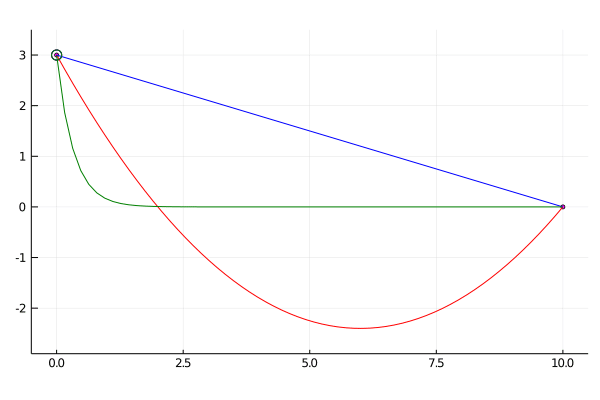

In [21]:
x = range(x0, xf, length=n)
μ = (3xf + 2x0) / 5
coefs = [1 (x0 - μ)^2; 1 (xf - μ)^2] \ [y0; yf]
y1 = coefs[1] .+ coefs[2] * (x .- μ).^2
y2 = (x .- xf) / (x0 - xf) * y0
y3 = (y0 - yf) * exp.(-3x) .+ yf
y3[end] = yf

XA1, YA1 = animacao(x, y1)
XA2, YA2 = animacao(x, y2)
XA3, YA3 = animacao(x, y3)

XS = [XA1, XA2, XA3]
YS = [YA1, YA2, YA3]
N = maximum(length.(XS)) + 10

colors = [:red, :blue, :green, :magenta]
anim = Animation()
θ = range(0, 2π, length=60)
sθ, cθ = sin.(θ), cos.(θ)
for t = 1:20:N
    scatter([x0, xf], [y0, yf], c=:magenta, ms=3, leg=false,
            axis_ratio=:equal)
    for k = 1:length(XS)
        plot!(XS[k], YS[k], c=colors[k])
        idx = min(length(XS[k]), t)
        xc, yc = XS[k][idx], YS[k][idx]
        plot!(xc .+ 0.1cθ, yc .+ 0.1sθ, c=colors[k])
    end
    xlims!(x0 - 0.5, xf + 0.5)
    ylims!(minimum(minimum.(YS)) - 0.5, y0 + 0.5)
    frame(anim)
end
gif(anim, fps=24)

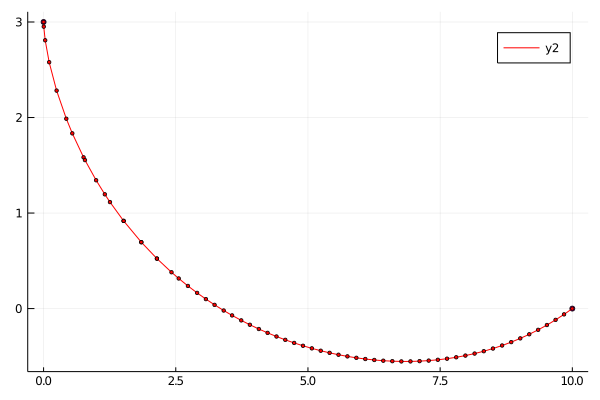

In [25]:
using Logging

nlp = ADNLPModel(xy -> simula(xy[1:n], xy[n+1:2n]), [x; y2],
        lvar=[x0; fill(-Inf, n-2); xf; y0; fill(-Inf, n-2); yf],
        uvar=[x0; fill( Inf, n-2); xf; y0; fill( Inf, n-2); yf])
output = with_logger(NullLogger()) do
    tron(nlp, max_time=5.0)
end

scatter([x0, xf], [y0, yf], c=:magenta, ms=3, lab="")
sol = output.solution
plot!(sol[1:n], sol[n+1:2n], c=:red)
scatter!(sol[1:n], sol[n+1:2n], ms=2, c=:red, lab="")

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/seminarios/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/ninUP/src/animation.jl:104


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/seminarios/tmp.gif")
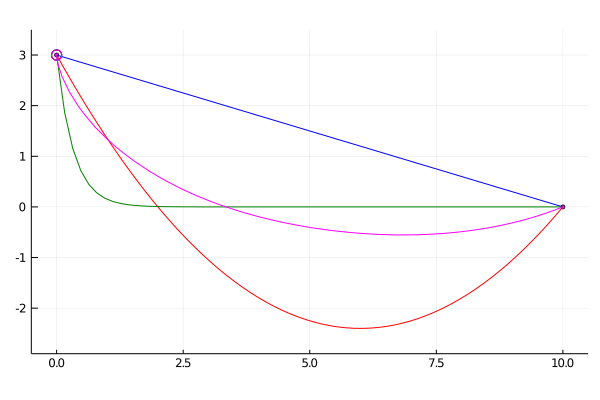

In [26]:
x = range(x0, xf, length=n)
μ = (3xf + 2x0) / 5
coefs = [1 (x0 - μ)^2; 1 (xf - μ)^2] \ [y0; yf]
y1 = coefs[1] .+ coefs[2] * (x .- μ).^2
y2 = (x .- xf) / (x0 - xf) * y0
y3 = (y0 - yf) * exp.(-3x) .+ yf
y3[end] = yf

XA1, YA1 = animacao(x, y1)
XA2, YA2 = animacao(x, y2)
XA3, YA3 = animacao(x, y3)
XA4, YA4 = animacao(sol[1:n], sol[n+1:end])

XS = [XA1, XA2, XA3, XA4]
YS = [YA1, YA2, YA3, YA4]
N = maximum(length.(XS)) + 10

colors = [:red, :blue, :green, :magenta]
anim = Animation()
θ = range(0, 2π, length=60)
sθ, cθ = sin.(θ), cos.(θ)
for t = 1:20:N
    scatter([x0, xf], [y0, yf], c=:magenta, ms=3, leg=false,
            axis_ratio=:equal)
    for k = 1:length(XS)
        plot!(XS[k], YS[k], c=colors[k])
        idx = min(length(XS[k]), t)
        xc, yc = XS[k][idx], YS[k][idx]
        plot!(xc .+ 0.1cθ, yc .+ 0.1sθ, c=colors[k])
    end
    xlims!(x0 - 0.5, xf + 0.5)
    ylims!(minimum(minimum.(YS)) - 0.5, y0 + 0.5)
    frame(anim)
end
gif(anim, fps=24)